In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
sum(train_data.duplicated())

0

In [4]:
train_data.drop_duplicates(inplace=True)

In [5]:
train_data.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
train_data.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [8]:
unique_labels = train_data["Sex"].explode().unique()
print(unique_labels)

['male' 'female']


In [9]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

# Extract the 'Cabin' column
cabin_column = train_data[['Cabin']]
embarked_column = train_data[['Embarked']]

# Use SimpleImputer to fill in NaN values in the 'Cabin' column
imputer = SimpleImputer(strategy='most_frequent')
cabin_column_imputed = imputer.fit_transform(cabin_column)
embarked_column_imputed = imputer.fit_transform(embarked_column)

# Flatten the 2D array to a 1D array using ravel()
cabin_column_imputed = cabin_column_imputed.ravel()
train_data['Embarked']=embarked_column_imputed.ravel()

# Convert the NumPy array to a pandas Series
cabin_column_imputed_series = pd.Series(cabin_column_imputed)

# Extract the cabin letter
train_data['CabinLetter'] = cabin_column_imputed_series.astype(str).str[0]

# Map the cabin letter to ordinal categories
cabin_mapping = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'T': 8}  # Add more categories as needed
embarked_mapping = {'S': 1, 'C': 2, 'Q': 3}
gender_mapping = {'male': 1, 'female': 2}
train_data['CabinOrdinal'] = train_data['CabinLetter'].map(cabin_mapping)
train_data['SexOrdinal'] = train_data['Sex'].map(gender_mapping)
train_data['Cabin']=train_data['CabinOrdinal']
train_data['EmbarkedOrdinal'] = train_data['Embarked'].map(embarked_mapping)
train_data['Embarked']=train_data['EmbarkedOrdinal']
train_data['Sex']=train_data['SexOrdinal']
# Display the result
#print(train_data[['Cabin', 'CabinLetter', 'CabinOrdinal', 'EmbarkedOrdinal']])
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PassengerId      891 non-null    int64  
 1   Survived         891 non-null    int64  
 2   Pclass           891 non-null    int64  
 3   Name             891 non-null    object 
 4   Sex              891 non-null    int64  
 5   Age              714 non-null    float64
 6   SibSp            891 non-null    int64  
 7   Parch            891 non-null    int64  
 8   Ticket           891 non-null    object 
 9   Fare             891 non-null    float64
 10  Cabin            891 non-null    int64  
 11  Embarked         891 non-null    int64  
 12  CabinLetter      891 non-null    object 
 13  CabinOrdinal     891 non-null    int64  
 14  SexOrdinal       891 non-null    int64  
 15  EmbarkedOrdinal  891 non-null    int64  
dtypes: float64(2), int64(11), object(3)
memory usage: 111.5+ KB
No

In [10]:
train_data=train_data.drop(columns=['EmbarkedOrdinal'])
train_data=train_data.drop(columns=['SexOrdinal'])
train_data=train_data.drop(columns=['Ticket'])
train_data=train_data.drop(columns=['Name'])
train_data=train_data.drop(columns=['CabinOrdinal'])
train_data=train_data.drop(columns=['CabinLetter'])


In [11]:
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [12]:
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2,1
1,2,1,1,2,38.0,1,0,71.2833,3,2
2,3,1,3,2,26.0,0,0,7.9250,2,1
3,4,1,1,2,35.0,1,0,53.1000,3,1
4,5,0,3,1,35.0,0,0,8.0500,2,1


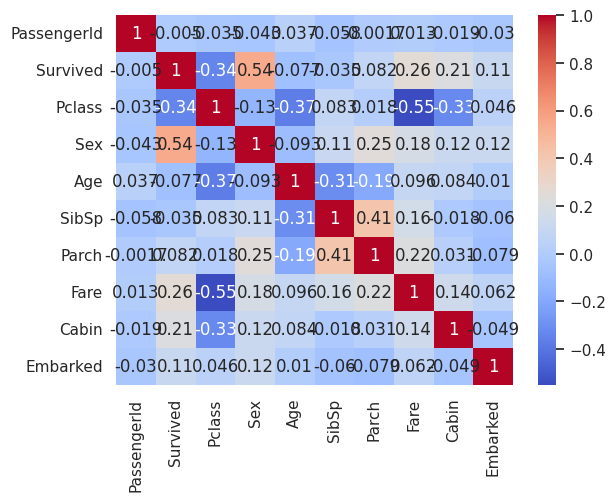

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.heatmap(train_data.corr(), cmap='coolwarm',annot=True)
plt.show()

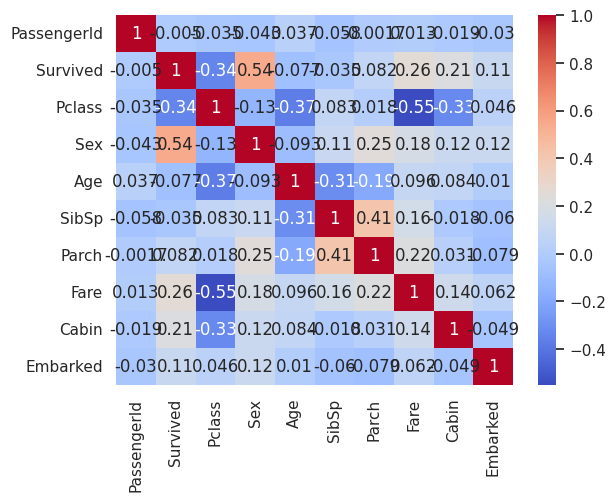

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.heatmap(train_data.corr(), cmap='coolwarm',annot=True)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

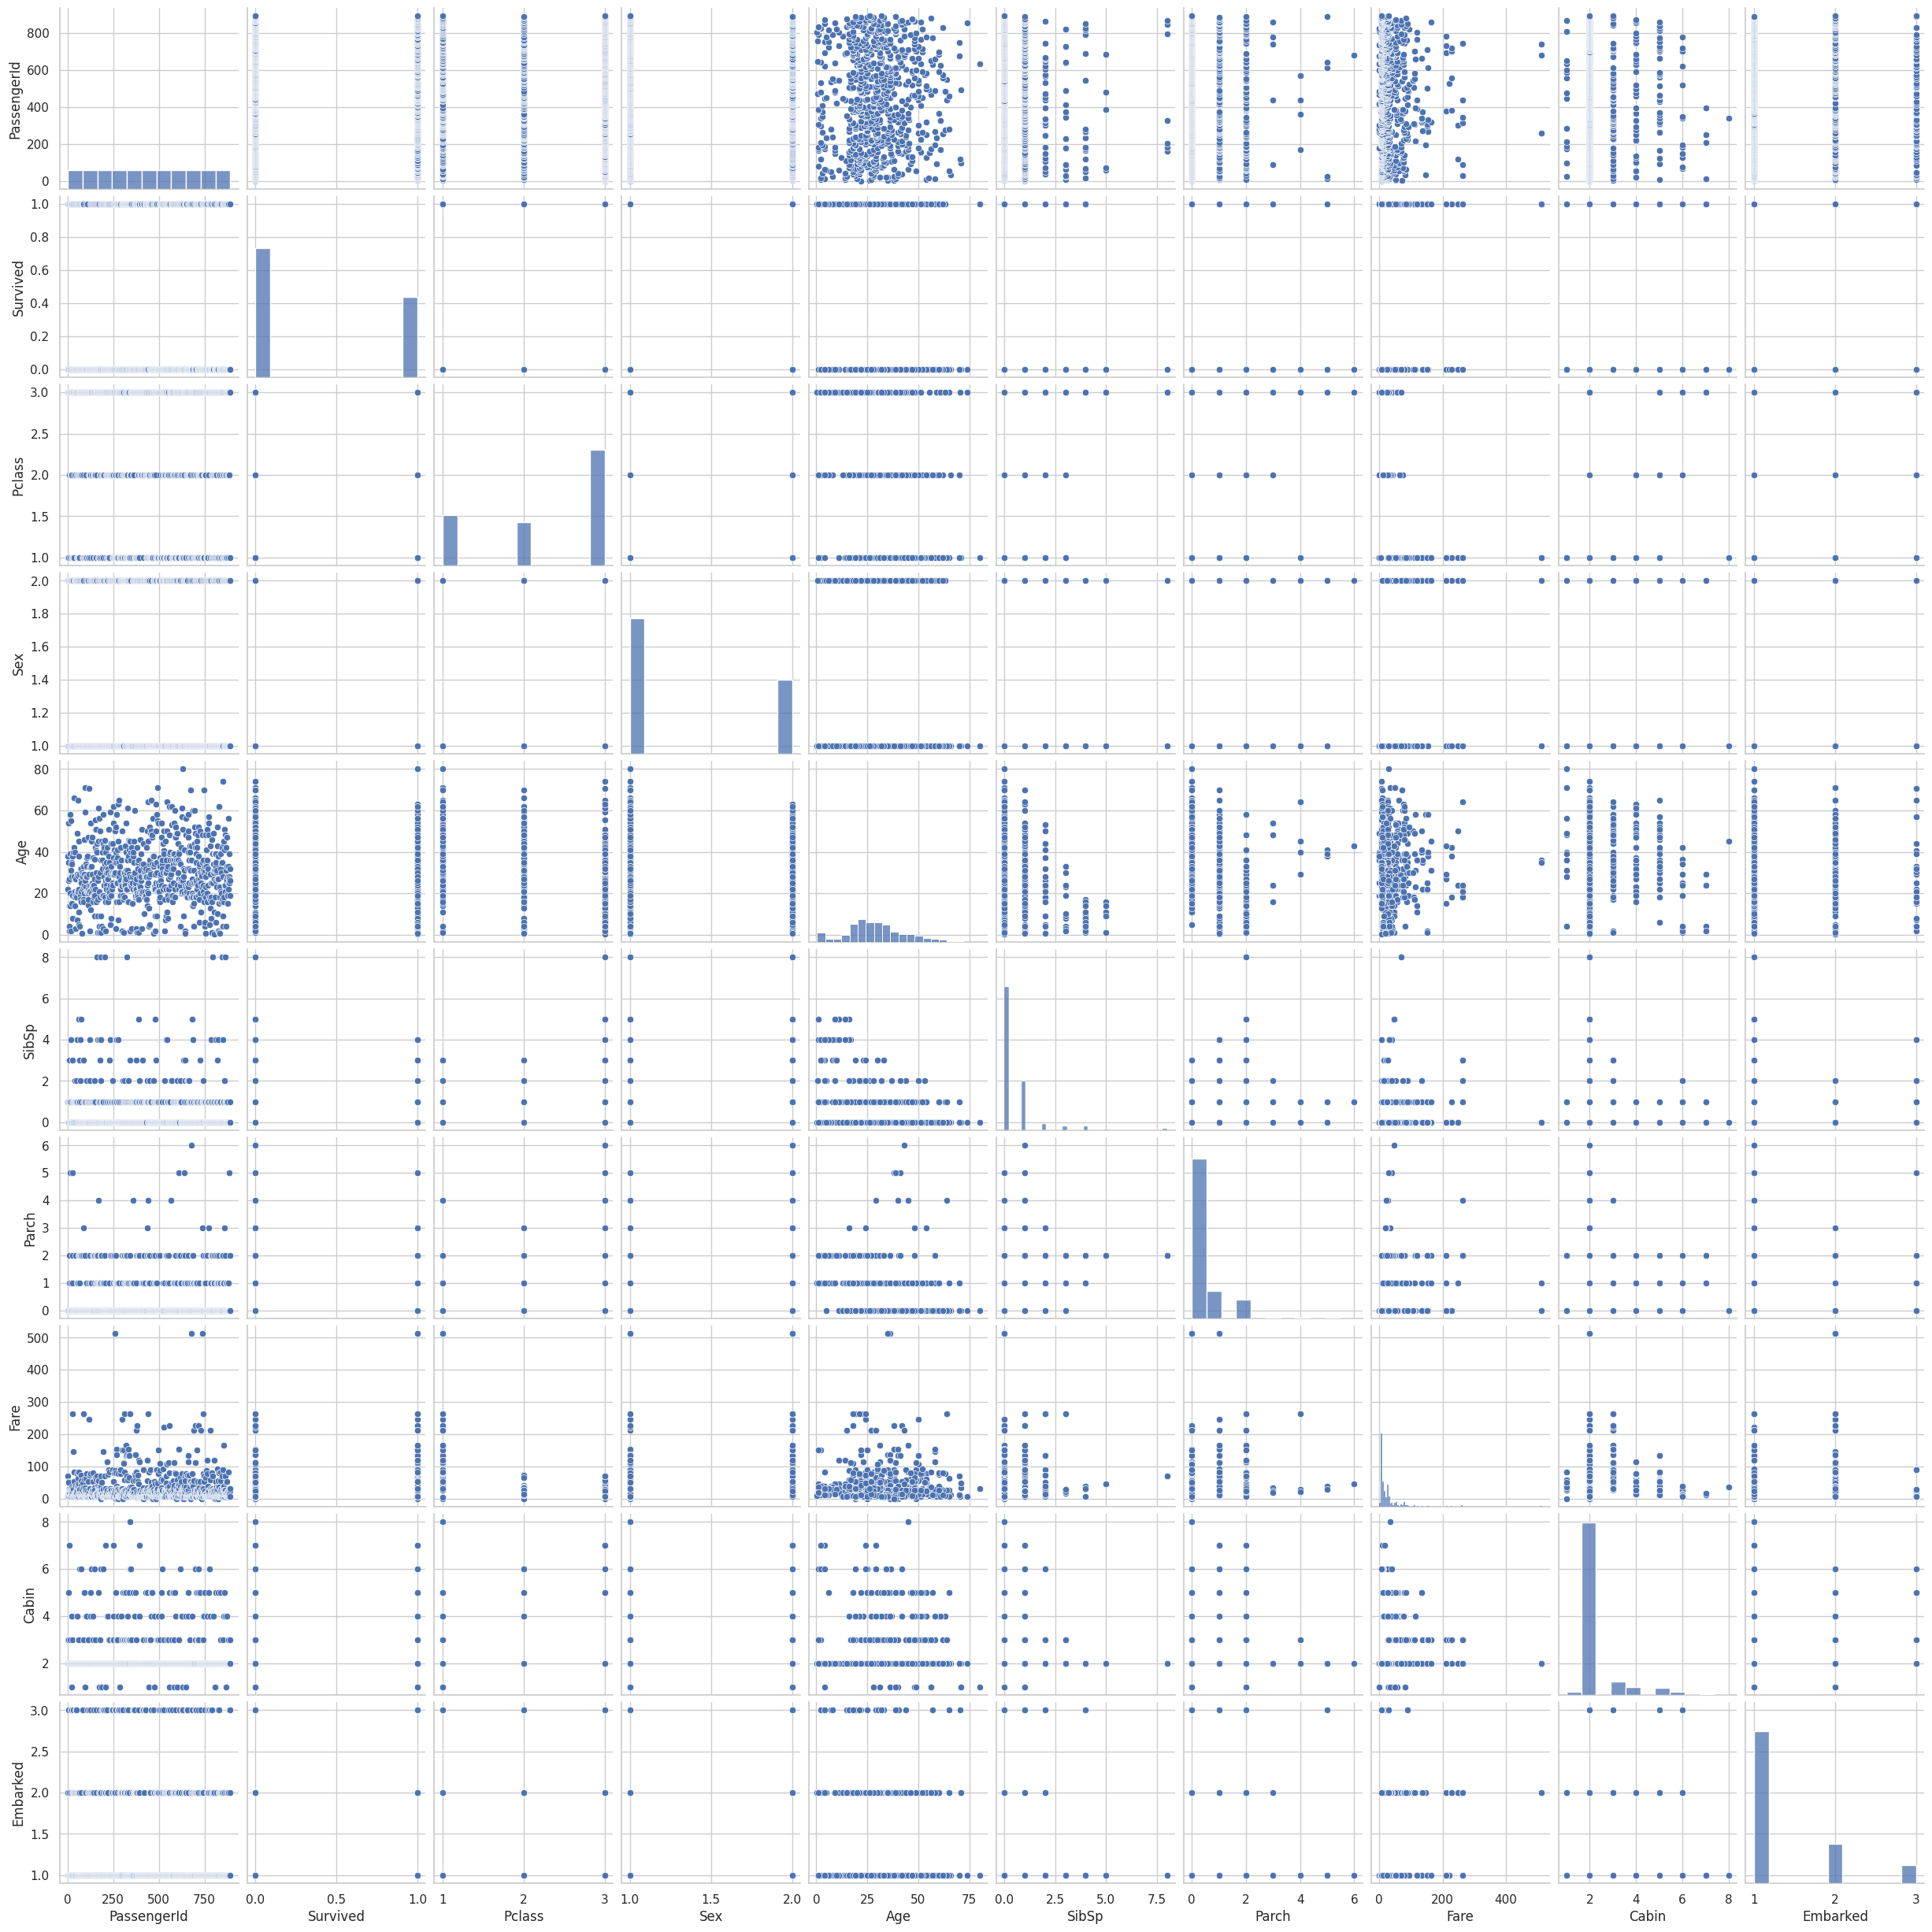

In [15]:
sns.set_style('whitegrid')
sns.pairplot(train_data)
plt.show()

In [16]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

# Extract the 'Cabin' column
cabin_column = test_data[['Cabin']]
embarked_column = test_data[['Embarked']]

# Use SimpleImputer to fill in NaN values in the 'Cabin' column
imputer = SimpleImputer(strategy='most_frequent')
cabin_column_imputed = imputer.fit_transform(cabin_column)
embarked_column_imputed = imputer.fit_transform(embarked_column)

# Flatten the 2D array to a 1D array using ravel()
cabin_column_imputed = cabin_column_imputed.ravel()
test_data['Embarked']=embarked_column_imputed.ravel()
# Convert the NumPy array to a pandas Series
cabin_column_imputed_series = pd.Series(cabin_column_imputed)

# Extract the cabin letter
test_data['CabinLetter'] = cabin_column_imputed_series.astype(str).str[0]

# Map the cabin letter to ordinal categories
cabin_mapping = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'T': 8}  # Add more categories as needed
embarked_mapping = {'S': 1, 'C': 2, 'Q': 3}
gender_mapping = {'male': 1, 'female': 2}
test_data['CabinOrdinal'] = test_data['CabinLetter'].map(cabin_mapping)
test_data['SexOrdinal'] = test_data['Sex'].map(gender_mapping)
test_data['Cabin']=test_data['CabinOrdinal']
test_data['EmbarkedOrdinal'] = test_data['Embarked'].map(embarked_mapping)
test_data['Embarked']=test_data['EmbarkedOrdinal']
test_data['Sex']=test_data['SexOrdinal']
# Display the result
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PassengerId      418 non-null    int64  
 1   Pclass           418 non-null    int64  
 2   Name             418 non-null    object 
 3   Sex              418 non-null    int64  
 4   Age              332 non-null    float64
 5   SibSp            418 non-null    int64  
 6   Parch            418 non-null    int64  
 7   Ticket           418 non-null    object 
 8   Fare             417 non-null    float64
 9   Cabin            418 non-null    int64  
 10  Embarked         418 non-null    int64  
 11  CabinLetter      418 non-null    object 
 12  CabinOrdinal     418 non-null    int64  
 13  SexOrdinal       418 non-null    int64  
 14  EmbarkedOrdinal  418 non-null    int64  
dtypes: float64(2), int64(10), object(3)
memory usage: 49.1+ KB
None


In [17]:
test_data=test_data.drop(columns=['EmbarkedOrdinal'])
test_data=test_data.drop(columns=['SexOrdinal'])
test_data=test_data.drop(columns=['Ticket'])
test_data=test_data.drop(columns=['Name'])
test_data=test_data.drop(columns=['CabinOrdinal'])
test_data=test_data.drop(columns=['CabinLetter'])

In [18]:
women = train_data.loc[train_data.Sex == 2]["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

% of women who survived: 0.7420382165605095


In [19]:
men = train_data.loc[train_data.Sex == 1]["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

% of men who survived: 0.18890814558058924


In [20]:
from sklearn.ensemble import RandomForestClassifier

y = train_data["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission1.csv', index=False)
print("Your submission was successfully saved!")


Your submission was successfully saved!


In [21]:
my_param_grid = {'n_estimators':[100], 'criterion':['entropy','gini'],
                 'max_features':['log2'], 'max_depth':[10]}

In [22]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(estimator=RandomForestClassifier(random_state=1),param_grid= my_param_grid, refit = True, verbose=2, cv=5 )
# verbose just means the text output describing the process. (the greater the number the more detail you will get).
# May take a while!
grid.fit(X, y)


Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] END criterion=entropy, max_depth=10, max_features=log2, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, max_features=log2, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, max_features=log2, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, max_features=log2, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, max_features=log2, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=10, max_features=log2, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=10, max_features=log2, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=10, max_features=log2, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=10, max_features=log2, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=10, max_features=log2, n_estimators

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
             param_grid={'criterion': ['entropy', 'gini'], 'max_depth': [10],
                         'max_features': ['log2'], 'n_estimators': [100]},
             verbose=2)

In [23]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 'log2',
 'n_estimators': 100}

In [24]:
grid.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=10, max_features='log2',
                       random_state=1)

In [25]:
y_hat_optimized = grid.predict(X_test)

In [26]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': y_hat_optimized})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [27]:
import pandas as pd

# Load the CSV files into Pandas DataFrames
df1 = pd.read_csv('submission.csv')
df2 = pd.read_csv('submission1.csv')

# Compare the two DataFrames and find the differences
differences = df1.compare(df2)

# Print the differences
print("Differences between the two CSV files:")
print(differences)

Differences between the two CSV files:
    Survived      
        self other
1        0.0   1.0
7        1.0   0.0
18       0.0   1.0
69       0.0   1.0
89       1.0   0.0
90       0.0   1.0
149      1.0   0.0
194      1.0   0.0
247      1.0   0.0
249      0.0   1.0
273      0.0   1.0
309      0.0   1.0
359      0.0   1.0
383      0.0   1.0
